# <center> True vs Predicted</center>

In [26]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

with open('../models/linear_regression_metrics.json', 'r') as f:
    lr_metrics = json.load(f)
    

with open('../models/ridge_metrics.json', 'r') as f:
    r_metrics = json.load(f)
    

with open('../models/lasso_metrics.json', 'r') as f:
    l_metrics = json.load(f)
    

with open('../models/random_forest_metrics.json', 'r') as f:
    rf_metrics = json.load(f)
    

models = ['linear_regression', 'ridge', 'lasso', 'random_forest']
metrics = {}

for model in models:
    with open(f'../models/{model}_metrics.json', 'r') as f:
        data = json.load(f)
        name = model.replace('_', ' ').title().replace('Regression', 'Regression').replace('Random Forest', 'RandomForest')
        metrics[name] = {k: data[k] for k in ['mae', 'mse', 'r2']}


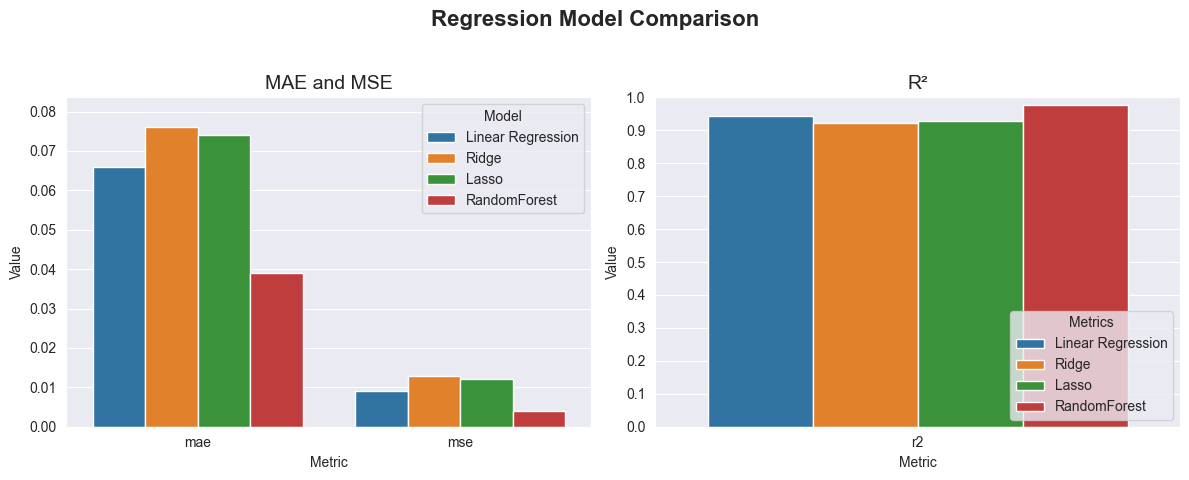

In [25]:
sns.set_style('darkgrid')

df_metrics = pd.DataFrame(metrics).T  # Transpose the DataFrame
df_metrics = df_metrics.reset_index().rename(columns={'index': 'Model'})
df_long = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Ошибки
error_df = df_long[df_long['Metric'].isin(['mae', 'mse'])]
sns.barplot(data=error_df, x='Metric', y='Value', hue='Model', ax=axs[0])
axs[0].set_title("MAE and MSE", fontsize=14)
axs[0].set_ylim(0, error_df['Value'].max() * 1.1)

# R2 отдельно
r2_df = df_long[df_long['Metric'] == 'r2']
sns.barplot(data=r2_df, x='Metric', y='Value', hue='Model', ax=axs[1])
axs[1].set_title("R²", fontsize=14)
axs[1].set_ylim(0, 1)

plt.yticks(np.arange(0, 1.1, 0.1)),
plt.legend(title="Metrics", loc='lower right')
plt.suptitle("Regression Model Comparison", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("../plots/metrics_comparison.png")
plt.show()


We tested 4 models: Linear Regression, Ridge, Lasso and Random Forest.

According to the metrics (MAE, MSE, R²), **Random Forest shows the best result**. It minimizes errors and predicts the price logarithm as accurately as possible.

**Selected model:** `Random Forest Regressor`

This model was used for the final submission, the predictions were scaled to the original scale using `np.expm1()` and saved in `random_forest_submission.csv`.